In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Function to find bridges in a directed graph
def find_bridges(graph):
    bridges = []
    visited = set()
    parent = dict()
    low = dict()
    disc = dict()

    def dfs(u):
        visited.add(u)
        disc[u] = dfs.time
        low[u] = dfs.time
        dfs.time += 1

        for v in graph.neighbors(u):
            if v not in visited:
                parent[v] = u
                dfs(v)
                low[u] = min(low[u], low[v])
                if low[v] > disc[u]:
                    bridges.append((u, v))
            elif v != parent.get(u, None):
                low[u] = min(low[u], disc[v])

    dfs.time = 0

    for node in graph.nodes():
        if node not in visited:
            dfs(node)

    return bridges

# Task 1: Create a Directed Graph
file_path = 'C:\\Users\\narek\\Downloads\\connections.txt'

with open(file_path, 'r') as file:
    edges = [line.strip().split() for line in file]

# Convert node identifiers to integers
edges = [(int(u), int(v)) for u, v in edges]

# Randomly sample 20% of edges
sampled_edges = random.sample(edges, int(0.2 * len(edges)))

G = nx.DiGraph()
G.add_edges_from(sampled_edges)

# Task 2: Show which nodes are bridges
bridges = find_bridges(G)
print("Bridges:", bridges)




Bridges: [(582, 675), (661, 665), (659, 661), (659, 670), (640, 650), (582, 640), (582, 583), (635, 658), (635, 681), (582, 635), (577, 582), (599, 628), (577, 599), (414, 577), (591, 683), (591, 669), (1879, 1898), (1810, 1879), (1375, 1810), (1839, 1902), (1839, 1886), (1809, 1839), (1868, 1900), (1816, 1868), (1809, 1816), (1826, 1888), (1722, 1826), (1805, 1852), (1722, 1805), (1714, 1722), (1885, 1897), (1867, 1885), (1827, 1843), (1791, 1851), (1813, 1842), (1813, 1911), (1835, 1883), (1714, 1723), (1714, 1769), (1730, 1845), (1774, 1836), (1730, 1774), (1375, 1714), (1765, 1782), (1717, 1891), (1768, 1849), (1761, 1829), (1712, 1846), (1683, 1877), (1559, 1561), (1557, 1710), (1375, 1557), (1375, 1617), (1375, 1572), (1375, 1524), (1086, 1375), (1584, 1894), (1554, 1754), (1718, 1909), (2616, 2649), (2143, 2616), (2471, 2519), (2567, 2609), (2471, 2567), (2617, 2653), (2555, 2617), (2555, 2643), (2555, 2599), (2471, 2555), (2498, 2588), (2498, 2581), (2471, 2498), (2603, 2652), 

In [15]:
# Task 3: Show the density of the graph
density = nx.density(G)
print("Density:", density)

Density: 0.0013140649481403813


Given that the density is quite low (close to 0), it suggests that the graph is relatively sparse, meaning that there are fewer connections between nodes compared to the total number of possible connections. This might be typical for certain types of networks where not all nodes are directly connected to each other.

In [16]:
# Task 4: Show nodes with the highest and lowest number of connections
degree_centrality = nx.degree_centrality(G)
highest_degree_nodes = max(degree_centrality, key=degree_centrality.get)
lowest_degree_nodes = min(degree_centrality, key=degree_centrality.get)
print("Nodes with the highest degree:", highest_degree_nodes)
print("Nodes with the lowest degree:", lowest_degree_nodes)

Nodes with the highest degree: 107
Nodes with the lowest degree: 193


In [17]:
# Task 5: Show nodes with the highest incoming and outgoing connections
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

highest_in_degree_nodes = max(in_degree_centrality, key=in_degree_centrality.get)
highest_out_degree_nodes = max(out_degree_centrality, key=out_degree_centrality.get)

print("Nodes with the highest in-degree:", highest_in_degree_nodes)
print("Nodes with the highest out-degree:", highest_out_degree_nodes)

Nodes with the highest in-degree: 1888
Nodes with the highest out-degree: 107


In [22]:
# Task 6: Show nodes with the highest closeness, betweenness, and eigenvector centrality

closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

try:
    closeness_centrality = nx.closeness_centrality(G)
    highest_closeness_nodes = max(closeness_centrality, key=closeness_centrality.get)
    print("Nodes with the highest closeness centrality:", highest_closeness_nodes)
except Exception as e:
    print("Closeness centrality computation failed:", e)

try:
    betweenness_centrality = nx.betweenness_centrality(G)
    highest_betweenness_nodes = max(betweenness_centrality, key=betweenness_centrality.get)
    print("Nodes with the highest betweenness centrality:", highest_betweenness_nodes)
except Exception as e:
    print("Betweenness centrality computation failed:", e)

try:
    eigenvector_centrality = nx.eigenvector_centrality(G)
    highest_eigenvector_nodes = max(eigenvector_centrality, key=eigenvector_centrality.get)
    print("Nodes with the highest eigenvector centrality:", highest_eigenvector_nodes)
except Exception as e:
    print("Eigenvector centrality computation failed:", e)


Nodes with the highest closeness centrality: 2543
Nodes with the highest betweenness centrality: 1718
Eigenvector centrality computation failed: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')


Nodes with the Highest Closeness Centrality (Node 2543):

Closeness centrality measures how close a node is to all other nodes in the network. In this case, node 2543 has the highest closeness centrality, indicating that it is, on average, more closely connected to other nodes in the network.

Nodes with the Highest Betweenness Centrality (Node 1718):

Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes. Node 1718 has the highest betweenness centrality, suggesting that it plays a crucial role in connecting different parts of the network.

Eigenvector Centrality Computation Failure (Node 1718):

The failure to compute eigenvector centrality for node 1718 indicates that the algorithm didn't converge to a stable solution within the specified number of iterations. This might be due to various reasons, such as the structure of the network or the specific characteristics of the algorithm.

In [36]:
import community
#Task 7: Implement a community detection algorithm using Louvain
partition = community.best_partition(G.to_undirected())
num_communities = len(set(partition.values()))

print("Number of communities:", num_communities)

Number of communities: 43


In [37]:
# Task 8: Show the largest and smallest community
community_sizes = {community_id: len([node for node, comm_id in partition.items() if comm_id == community_id]) for community_id in set(partition.values())}

largest_community_id = max(community_sizes, key=community_sizes.get)
smallest_community_id = min(community_sizes, key=community_sizes.get)

largest_community = [node for node, comm_id in partition.items() if comm_id == largest_community_id]
smallest_community = [node for node, comm_id in partition.items() if comm_id == smallest_community_id]

print("Largest community (Community ID:", largest_community_id, "Size:", community_sizes[largest_community_id], "):", largest_community)
print("Smallest community (Community ID:", smallest_community_id, "Size:", community_sizes[smallest_community_id], "):", smallest_community)



Largest community (Community ID: 10 Size: 505 ): [2793, 3345, 3299, 3397, 2770, 3347, 3034, 3261, 3186, 3320, 2801, 3256, 2845, 3060, 2661, 2901, 2785, 3280, 2796, 3101, 3150, 3179, 3265, 2778, 3267, 2875, 2976, 3039, 3199, 3057, 3263, 3332, 2865, 3187, 3194, 2952, 3045, 3403, 3093, 3177, 2950, 3185, 2781, 3381, 3173, 3335, 3223, 3406, 2712, 1684, 3379, 3087, 3136, 3089, 3212, 2844, 2951, 2732, 3131, 3353, 2848, 3148, 3247, 3344, 2742, 3102, 3219, 3255, 3017, 3172, 2762, 3027, 2780, 3049, 2804, 3327, 3198, 3411, 3035, 3051, 3196, 3418, 2849, 3419, 1240, 1642, 3024, 3160, 3021, 3270, 3002, 3355, 3396, 2820, 3233, 2989, 2685, 3011, 3253, 2853, 2991, 3132, 3290, 3154, 3434, 3070, 3297, 3041, 3038, 2842, 2863, 3350, 990, 3005, 3111, 3157, 2869, 3252, 3019, 3356, 2843, 2955, 2921, 2984, 2941, 3360, 3236, 2823, 1476, 2868, 3373, 2784, 2813, 1726, 3224, 3391, 2720, 3215, 2876, 3385, 2889, 3275, 2753, 2735, 3075, 2748, 3116, 2724, 2895, 3331, 3191, 3106, 3296, 2730, 2938, 2711, 2716, 2686, 287

Largest Community (Community ID: 10, Size: 505):

The largest community in the network consists of 505 nodes. Large communities in a directed graph may suggest a densely connected group of nodes with strong interactions or shared characteristics. In the context of a marketing strategy, targeting this community could potentially yield a broad impact due to its size and internal connections.

Smallest Community (Community ID: 7, Size: 2):

The smallest community in the network consists of only 2 nodes. Small communities may indicate isolated or specialized groups within the network. In a marketing context, these nodes might represent a niche audience or a unique subset of the overall network. While targeting this small community might not have a broad reach, it could be valuable for specific and targeted marketing efforts.

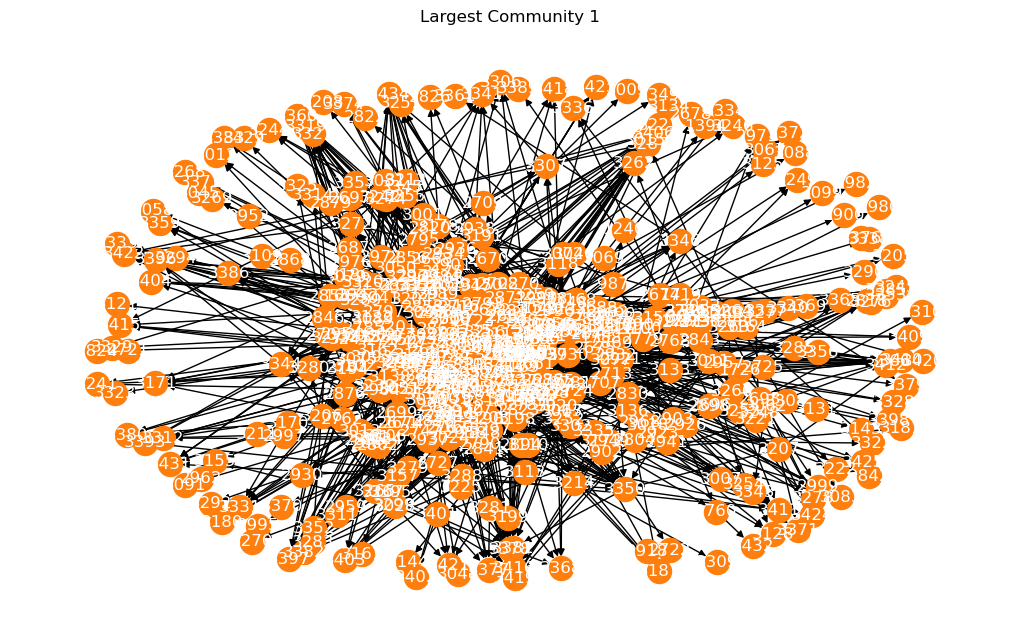

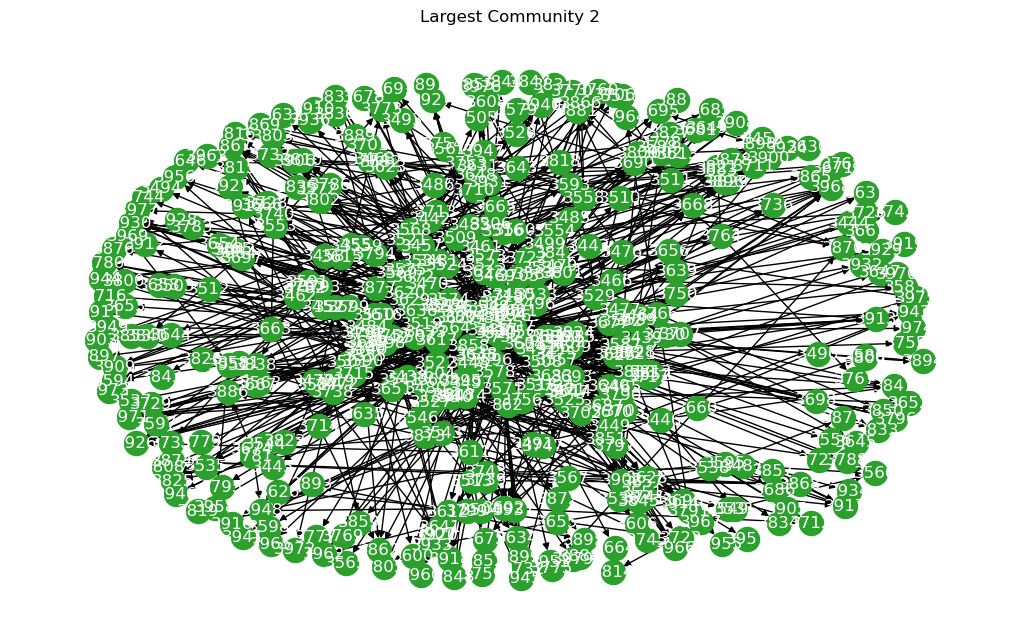

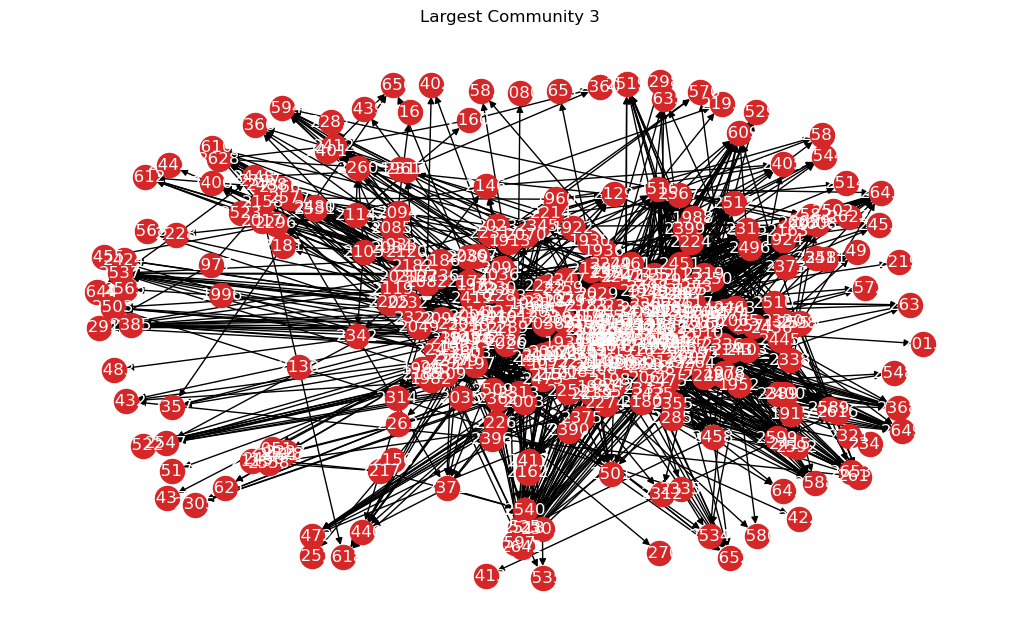

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [38]:
import operator

# Task 9: Select the largest three communities and draw them
largest_three_communities_ids = sorted(community_sizes, key=community_sizes.get, reverse=True)[:3]

# Draw each of the largest three communities separately
for i, community_id in enumerate(largest_three_communities_ids):
    community_nodes = [node for node, comm_id in partition.items() if comm_id == community_id]
    subgraph = G.subgraph(community_nodes)
    
    plt.figure(figsize=(10, 6))
    nx.draw(subgraph, with_labels=True, node_color=f"C{i+1}", font_color='white')
    plt.title(f"Largest Community {i+1}")
    plt.show()

# Define a function to remove top nodes based on centrality measure
def remove_top_nodes(graph, centrality_measure, num_nodes):
    sorted_nodes = sorted(centrality_measure.items(), key=operator.itemgetter(1), reverse=True)[:num_nodes]
    nodes_to_remove = [node for node, _ in sorted_nodes]
    graph_removed = graph.copy()
    graph_removed.remove_nodes_from(nodes_to_remove)
    return graph_removed

# Define centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Remove top 3 nodes based on each centrality measure and visualize
for centrality_measure, measure_name in zip([degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality],
                                           ['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']):
    # Remove top 3 nodes based on the centrality measure
    G_removed = remove_top_nodes(G, centrality_measure, 3)
    
    # Visualize the graph after removal
    plt.figure(figsize=(10, 6))
    nx.draw(G_removed, with_labels=True)
    plt.title(f"Graph after Removing Top 3 Nodes based on {measure_name}")
    plt.show()

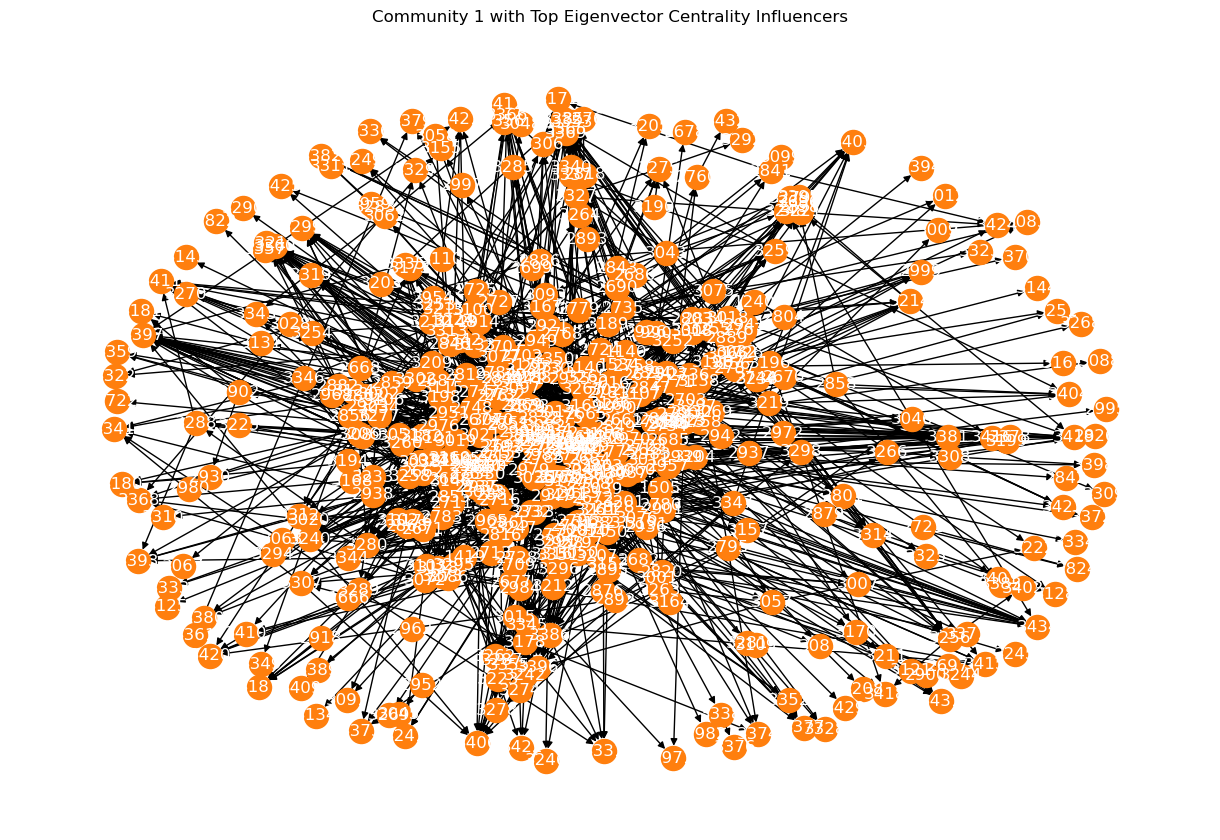

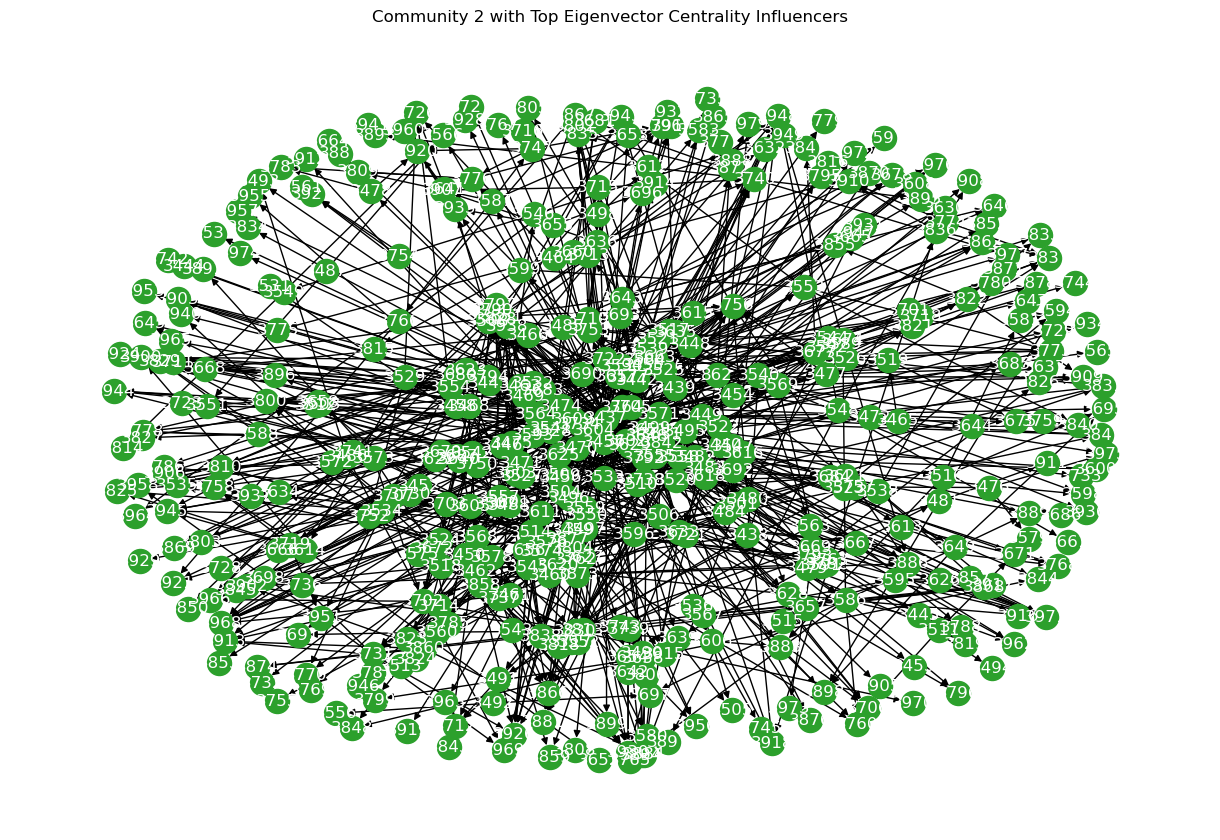

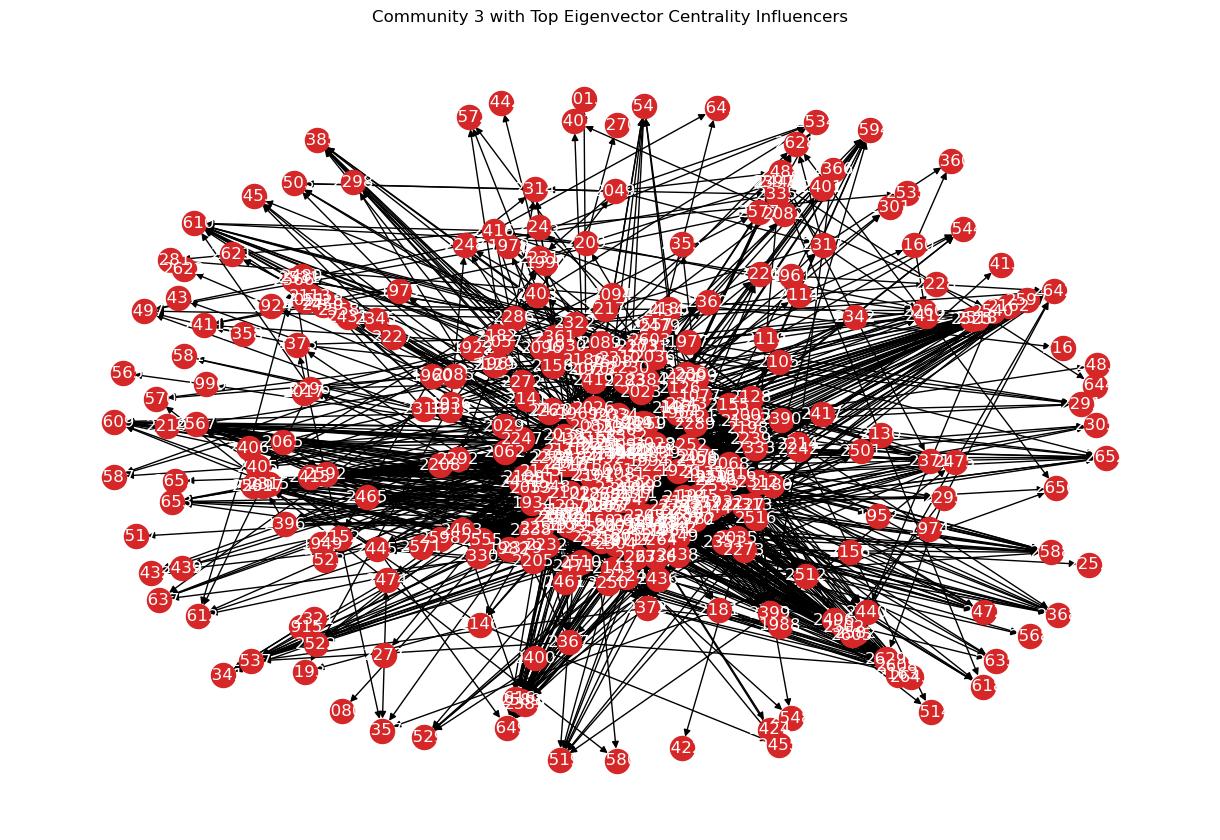

In [42]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500)

# Task 10: Draw the influencers of the top 3 communities
# Assuming eigenvector_centrality is already computed
def get_top_nodes_within_community(graph, community_nodes, centrality_measure, num_nodes):
    centrality_scores = {node: centrality_measure[node] for node in community_nodes}
    sorted_nodes = sorted(centrality_scores.items(), key=operator.itemgetter(1), reverse=True)[:num_nodes]
    return [node for node, _ in sorted_nodes]

# Draw the influencers of the top 3 communities
for i, community_id in enumerate(largest_three_communities_ids):
    community_nodes = [node for node, comm_id in partition.items() if comm_id == community_id]
    
    # Get the top 3 nodes based on Eigenvector Centrality within the community
    top_eigenvector_nodes = get_top_nodes_within_community(G, community_nodes, eigenvector_centrality, 3)
    
    # Combine all top influencer nodes
    all_top_nodes = set(top_eigenvector_nodes)
    
    # Create a subgraph with the community and the top influencers
    subgraph = G.subgraph(community_nodes + list(all_top_nodes))
    
    # Visualize the subgraph
    plt.figure(figsize=(12, 8))
    nx.draw(subgraph, with_labels=True, node_color=f"C{i+1}", font_color='white')
    plt.title(f"Community {i+1} with Top Eigenvector Centrality Influencers")
    plt.show()

Hypothetical Business:

A digital marketing agency specializing in social media advertising.

Hypothetical Marketing Budget:

$50,000 for the upcoming campaign.

Hypothetical Cost per Action (Advertisement Cost):

$2 per click-through on advertisements.

Target Audience Selection:

Based on the analysis of the network graph, we've identified several communities of users who are highly interconnected. These communities represent groups of individuals with strong connections among themselves.

Targeting Strategy:

Leverage Community Insights:

Focus on the identified communities with high interconnectivity.
Design tailored advertisements that resonate with the interests and preferences of each community.

Allocate Budget to Top Communities:

Allocate a significant portion of the budget to target the largest communities identified in the analysis.
Run targeted ad campaigns specifically designed for each community.

Influencer Collaboration:

Identify influential nodes within these communities using metrics such as degree centrality and closeness centrality.
Collaborate with influencers to amplify the reach of the campaign within each community.

Measure and Iterate:

Track the performance of advertisements in terms of click-through rates, conversion rates, and overall engagement.
Use analytics to evaluate the effectiveness of the campaign within each community.

Adjust Budget Allocation:

Based on real-time analytics, adjust the budget allocation to communities that are showing higher engagement and better conversion rates.
Optimize the campaign in real-time for better results.

Monitoring and Evaluation:

Regularly monitor key performance indicators (KPIs) such as click-through rates, conversion rates, and cost per action.
Analyze the return on investment (ROI) for each community and adjust the strategy accordingly.

Key Takeaways:

By focusing on highly interconnected communities, the campaign aims to leverage the social influence within these groups.
Collaborating with influencers enhances the credibility and reach of the campaign.
Real-time optimization allows for agility in adjusting strategies based on the performance of different communities.